In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#df_temp = pd.read_csv("caravan-insurance-challenge.csv")
df_train = pd.read_csv("C:/Users/bhara/OneDrive/Desktop/ticdata2000.txt", sep="	", header=None)
df_test = pd.read_csv("C:/Users/bhara/OneDrive/Desktop/ticeval2000.txt", sep="	", header=None)

In [18]:
X = df_train.drop([85],axis=1,inplace=False)
y = df_train[85]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.787


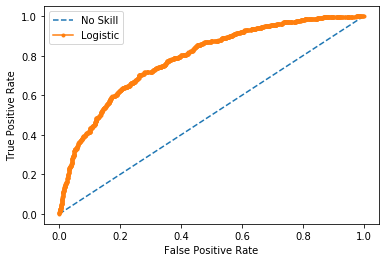

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot


model = LogisticRegression(solver='lbfgs',max_iter=10000)
model.fit(X,y)
# model.fit(trainX, trainy)
lr_probs = model.predict_proba(X)
lr_probs = lr_probs[:, 1]

ns_probs = [0 for _ in range(len(y))]

ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()